In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d mostafiz53/basicfinal

In [ ]:
!unzip -qq '/content/basicfinal.zip'

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
train_folder = '/content/basicfinal/basicfinal/Train'
test_folder = '/content/basicfinal/basicfinal/Test'
val_folder = '/content/basicfinal/basicfinal/Val'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,           #The value of shear_range represents a Shear angle in a counter-clockwise direction in degrees.
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
# Set the batch size and image size
batch_size = 32
image_size = (28,28)

In [ ]:
# Create generators for training, testing, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'# Change to 'binary' for binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
     color_mode='grayscale'# Change to 'binary' for binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
     color_mode='grayscale'# Change to 'binary' for binary classification
)
# Modify input_shape based on your image size and number of channels
input_shape = (image_size[0], image_size[1], 1)  # Change '1' to '3' for color images
# Define and compile your CNN model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



Found 8400 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Found 3600 images belonging to 50 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First block of layers
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second block of layers
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third block of layers
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Activation('softmax'))


    # Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       1

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

path_model = '/content/drive/MyDrive/modelsFinal/CMaterDB.h5'

# ModelCheckpoint setup to save the model after every epoch
#model_checkpoint_callback = ModelCheckpoint(
#    filepath=path_model,
  #  save_weights_only=False,
 #   monitor='val_loss',
 #   mode='auto',
  #  save_best_only=False)

# Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=val_generator,
    #callbacks=[model_checkpoint_callback],
    callbacks=[ModelCheckpoint(filepath=path_model)]
)

Epoch 1/100


<ipython-input-8-9a2e284e8386>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


262/262 [==============================] - 20s 41ms/step - loss: 3.8237 - accuracy: 0.0549 - val_loss: 3.8029 - val_accuracy: 0.0444
Epoch 2/100
  1/262 [..............................] - ETA: 10s - loss: 3.3825 - accuracy: 0.0312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


262/262 [==============================] - 8s 29ms/step - loss: 3.0733 - accuracy: 0.1941 - val_loss: 2.5527 - val_accuracy: 0.2956
Epoch 3/100
262/262 [==============================] - 9s 33ms/step - loss: 2.1614 - accuracy: 0.3962 - val_loss: 1.9526 - val_accuracy: 0.4450
Epoch 4/100
262/262 [==============================] - 8s 30ms/step - loss: 1.6542 - accuracy: 0.5184 - val_loss: 1.0268 - val_accuracy: 0.6983
Epoch 5/100
262/262 [==============================] - 8s 31ms/step - loss: 1.2683 - accuracy: 0.6138 - val_loss: 0.7166 - val_accuracy: 0.7769
Epoch 6/100
262/262 [==============================] - 9s 33ms/step - loss: 1.0331 - accuracy: 0.6818 - val_loss: 0.5824 - val_accuracy: 0.8239
Epoch 7/100
262/262 [==============================] - 8s 29ms/step - loss: 0.8473 - accuracy: 0.7391 - val_loss: 0.6482 - val_accuracy: 0.8081
Epoch 8/100
262/262 [==============================] - 8s 32ms/step - loss: 0.7551 - accuracy: 0.7735 - val_loss: 0.5903 - val_accuracy: 0.8144
Epoc

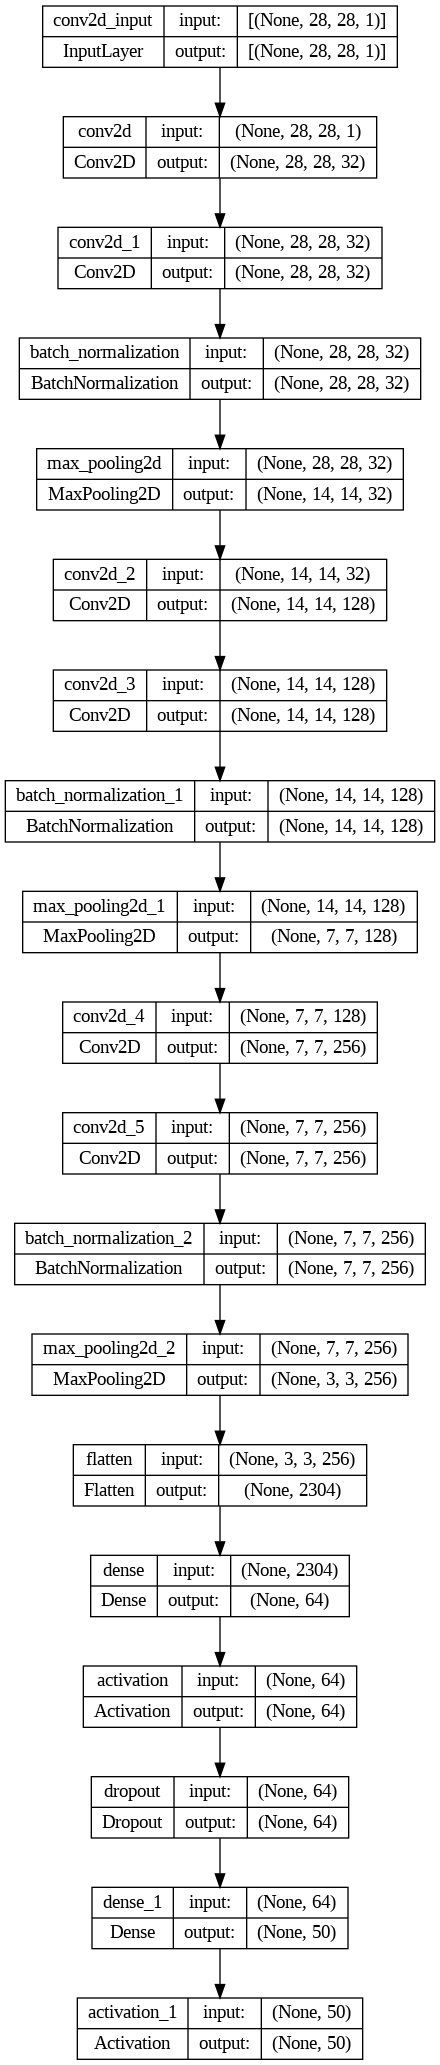

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

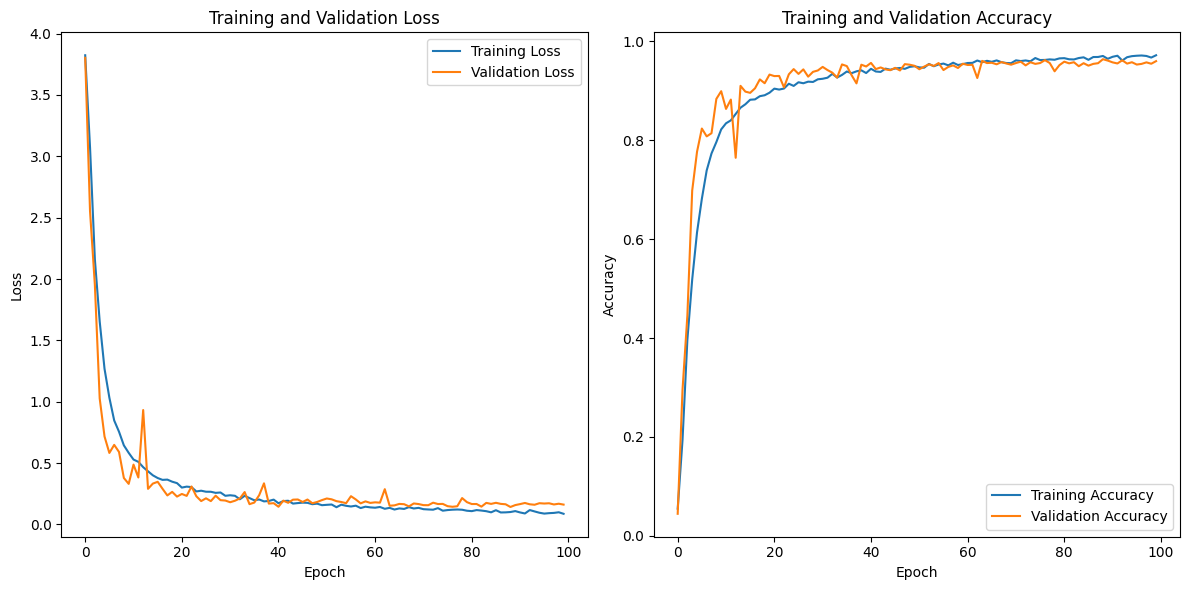

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(test_generator)

94/94 [==============================] - 2s 19ms/step - loss: 0.1359 - accuracy: 0.9643


[0.13590367138385773, 0.9643333554267883]

In [ ]:
model.evaluate(val_generator)

113/113 [==============================] - 1s 12ms/step - loss: 0.1614 - accuracy: 0.9603


[0.1614239364862442, 0.960277795791626]

In [ ]:
model.save('/content/drive/MyDrive/modelsFinal/CMaterDB.keras')